## 1. 커스텀 데이터셋(Custom Dataset)
---
torch.utils.data.Dataset을 상속받아 직접 커스템 데이터셋(Custom Dataset)을 만드는 경우도 있다. torch.utils.data.Datasets은 파이토치에서 데이터셋을 제공하는 추상 클래스다. Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어 본다.<br><br>
커스텀 데이터셋을 만들 때, 일단 가장 기본적인 뼈대는 아래와 같다. 여기서 필요한 기본적인 define은 3개다.

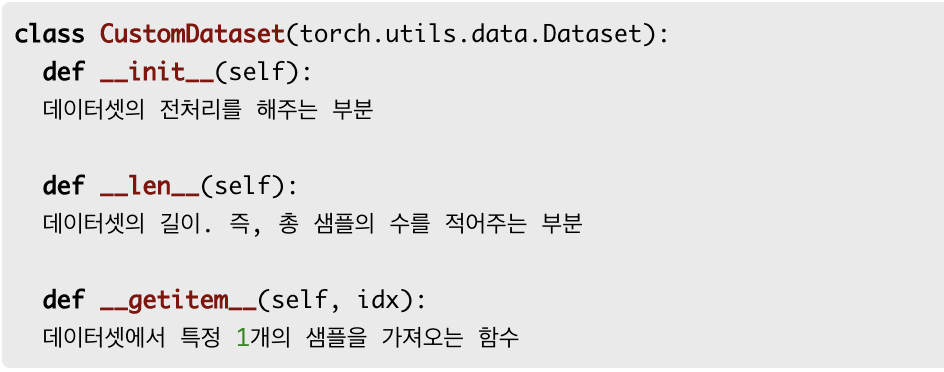

- len(dataset)을 했을 때 데이터셋의 크기를 리턴할 **len**
- dataset[i]를 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 **get_item**

## 2. 커스텀 데이터셋(Custom Dataset)으로 선형 회귀 구현하기
---

In [2]:
import torch
import torch.nn.functional as F

In [3]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [4]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y

In [5]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [6]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [8]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        prediction = model(x_train)
        
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 21189.515625
Epoch    0/20 Batch 2/3 Cost: 9527.332031
Epoch    0/20 Batch 3/3 Cost: 1292.721558
Epoch    1/20 Batch 1/3 Cost: 817.153320
Epoch    1/20 Batch 2/3 Cost: 225.302277
Epoch    1/20 Batch 3/3 Cost: 78.422028
Epoch    2/20 Batch 1/3 Cost: 34.326656
Epoch    2/20 Batch 2/3 Cost: 12.038782
Epoch    2/20 Batch 3/3 Cost: 0.040194
Epoch    3/20 Batch 1/3 Cost: 7.281492
Epoch    3/20 Batch 2/3 Cost: 0.790757
Epoch    3/20 Batch 3/3 Cost: 6.499403
Epoch    4/20 Batch 1/3 Cost: 1.503635
Epoch    4/20 Batch 2/3 Cost: 2.992182
Epoch    4/20 Batch 3/3 Cost: 9.566097
Epoch    5/20 Batch 1/3 Cost: 1.601896
Epoch    5/20 Batch 2/3 Cost: 3.659946
Epoch    5/20 Batch 3/3 Cost: 9.065211
Epoch    6/20 Batch 1/3 Cost: 2.691724
Epoch    6/20 Batch 2/3 Cost: 5.135334
Epoch    6/20 Batch 3/3 Cost: 2.271198
Epoch    7/20 Batch 1/3 Cost: 2.872331
Epoch    7/20 Batch 2/3 Cost: 4.726655
Epoch    7/20 Batch 3/3 Cost: 7.395170
Epoch    8/20 Batch 1/3 Cost: 2.849809
Epoch   

In [9]:
new_var = torch.FloatTensor([[73, 80, 75]])

pred_y = model(new_var)
print('훈련 후 입력이 73, 80, 75일 때의 예측값 :', pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.3338]], grad_fn=<AddmmBackward>)
